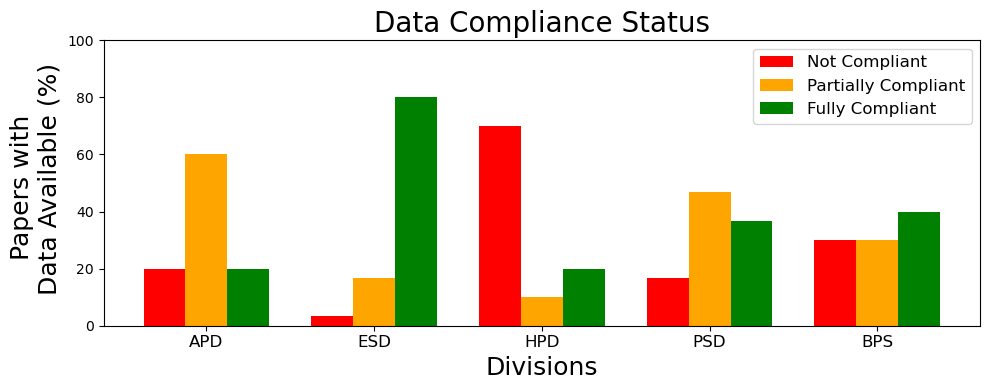

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['APD', 'ESD', 'HPD', 'PSD', 'BPS']
not_compliant = [20, 3.3, 70, 16.7, 30]
partially_compliant = [60, 16.7, 10, 46.7, 30]
fully_compliant = [20, 80, 20, 36.7, 40]  # Correcting BPS to 40%

# Set bar width
bar_width = 0.25
x = np.arange(len(categories))

# Create the plot
plt.figure(figsize=(10, 4))

# Create bars for each category
plt.bar(x - bar_width, not_compliant, width=bar_width, label='Not Compliant', color='red')
plt.bar(x, partially_compliant, width=bar_width, label='Partially Compliant', color='orange')
plt.bar(x + bar_width, fully_compliant, width=bar_width, label='Fully Compliant', color='green')

# Add labels and title with larger font sizes
plt.xlabel('Divisions', fontsize=18)
plt.ylabel('Papers with \n Data Available (%)', fontsize=18)
plt.title('Data Compliance Status', fontsize=20)
plt.xticks(x, categories, fontsize=12)
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


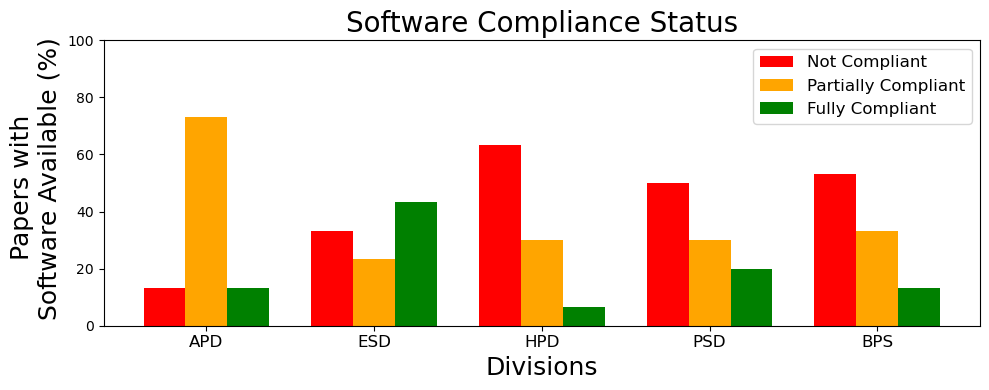

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['APD', 'ESD', 'HPD', 'PSD', 'BPS']
not_compliant = [13.3, 33.3, 63.3, 50, 53.3]
partially_compliant = [73.3, 23.3, 30, 30, 33.3]
fully_compliant = [13.3, 43.3, 6.7, 20, 13.3]  # Correcting BPS to 40%

# Set bar width
bar_width = 0.25
x = np.arange(len(categories))

# Create the plot
plt.figure(figsize=(10, 4))

# Create bars for each category
plt.bar(x - bar_width, not_compliant, width=bar_width, label='Not Compliant', color='red')
plt.bar(x, partially_compliant, width=bar_width, label='Partially Compliant', color='orange')
plt.bar(x + bar_width, fully_compliant, width=bar_width, label='Fully Compliant', color='green')

# Add labels and title with larger font sizes
plt.xlabel('Divisions', fontsize=18)
plt.ylabel('Papers with \n Software Available (%)', fontsize=18)
plt.title('Software Compliance Status', fontsize=20)
plt.xticks(x, categories, fontsize=12)
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [1]:
import os
import xarray as xr
from datetime import datetime

year=2024
file_output_name = './../../imerg'+str(year)+'.nc'
if os.path.exists(file_output_name):
    ds_ts = xr.open_dataset(file_output_name)
    ds_ts.close()
    istart = int(ds_ts.time[-1].dt.dayofyear.data) + 1
  

In [16]:
# Function to calculate percentage of -2 versus other values for each SMD division
def calculate_percentage_minus_two(data):
    results = {}

    # Group data by "SMD division"
    for division, group in data.groupby("SMD division"):
        # Calculate total counts for each column
        total_software = len(group["Software availability score"])
        total_data_access = len(group["Data accessibility score"])
        
        # Count occurrences of -2
        count_software_minus_two = (group["Software availability score"] == -2).sum()
        count_data_access_minus_two = (group["Data accessibility score"] == -2).sum()
        
        # Calculate percentage of -2
        percentage_software_minus_two = (count_software_minus_two / total_software) * 100
        percentage_data_access_minus_two = (count_data_access_minus_two / total_data_access) * 100
        
        # Store the results
        results[division] = {
            "Software availability score (-2 %)": percentage_software_minus_two,
            "Data accessibility score (-2 %)": percentage_data_access_minus_two
        }

    return results

# Call the function and store the results
percentages = calculate_percentage_minus_two(data)

# Display the percentages for each SMD division
for division, percent in percentages.items():
    print(f"{division}:")
    print(f"  Software availability score (-2 %): {percent['Software availability score (-2 %)']:.2f}%")
    print(f"  Data accessibility score (-2 %): {percent['Data accessibility score (-2 %)']:.2f}%")



APD:
  Software availability score (-2 %): 13.33%
  Data accessibility score (-2 %): 20.00%
BPS:
  Software availability score (-2 %): 53.33%
  Data accessibility score (-2 %): 30.00%
ESD:
  Software availability score (-2 %): 33.33%
  Data accessibility score (-2 %): 3.33%
HPD:
  Software availability score (-2 %): 63.33%
  Data accessibility score (-2 %): 70.00%
PSD:
  Software availability score (-2 %): 50.00%
  Data accessibility score (-2 %): 16.67%


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = './../../R&A scoring - anon sample.csv'
data = pd.read_csv(file_path, header=1)

#-2 not compliant
#-1 partially compliant
# 0 fully compliant
# 1 more than compliant

#treat 0 and 1 same
# Replace all occurrences of 1 with 0 in the relevant columns
data["Software availability score"] = data["Software availability score"].replace(1, 0)
data["Data accessibility score"] = data["Data accessibility score"].replace(1, 0)

# Group the data by "SMD division" and calculate the frequency of values in the other two columns
histograms = {}
histograms = {}
for division, group in data.groupby("SMD division"):
    histograms[division] = {
        "Software availability score": group["Software availability score"].value_counts(),
        "Data accessibility score": group["Data accessibility score"].value_counts()
    }

for division, group in data.groupby("SMD division"):
    scores = histograms[division]
    # Calculate percentages for Software availability score
    software_total = scores["Software availability score"].sum()
    software_percentage = (scores["Software availability score"] / software_total) * 100
    # Calculate percentages for Data accessibility score
    data_total = scores["Data accessibility score"].sum()
    data_percentage = (scores["Data accessibility score"] / data_total) * 100
    print(division, data_percentage,software_percentage)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = './../../R&A scoring - anon sample.csv'
data = pd.read_csv(file_path, header=1)

#-2 not compliant
#-1 partially compliant
# 0 fully compliant
# 1 more than compliant

#treat 0 and 1 same
# Replace all occurrences of 1 with 0 in the relevant columns
data["Software availability score"] = data["Software availability score"].replace(1, 0)
data["Data accessibility score"] = data["Data accessibility score"].replace(1, 0)
#treat -1 and 0 same
# Replace all occurrences of 1 with 0 in the relevant columns
data["Software availability score"] = data["Software availability score"].replace(-1, 0)
data["Data accessibility score"] = data["Data accessibility score"].replace(-1, 0)

# Group the data by "SMD division" and calculate the frequency of values in the other two columns
histograms = {}
histograms = {}
for division, group in data.groupby("SMD division"):
    histograms[division] = {
        "Software availability score": group["Software availability score"].value_counts(),
        "Data accessibility score": group["Data accessibility score"].value_counts()
    }

for division, group in data.groupby("SMD division"):
    scores = histograms[division]
    # Calculate percentages for Software availability score
    software_total = scores["Software availability score"].sum()
    software_percentage = (scores["Software availability score"] / software_total) * 100
    # Calculate percentages for Data accessibility score
    data_total = scores["Data accessibility score"].sum()
    data_percentage = (scores["Data accessibility score"] / data_total) * 100
    print(division, data_percentage,software_percentage)

APD Data accessibility score
 0    80.0
-2    20.0
Name: count, dtype: float64 Software availability score
 0    86.666667
-2    13.333333
Name: count, dtype: float64
BPS Data accessibility score
 0    70.0
-2    30.0
Name: count, dtype: float64 Software availability score
-2    53.333333
 0    46.666667
Name: count, dtype: float64
ESD Data accessibility score
 0    96.666667
-2     3.333333
Name: count, dtype: float64 Software availability score
 0    66.666667
-2    33.333333
Name: count, dtype: float64
HPD Data accessibility score
-2    70.0
 0    30.0
Name: count, dtype: float64 Software availability score
-2    63.333333
 0    36.666667
Name: count, dtype: float64
PSD Data accessibility score
 0    83.333333
-2    16.666667
Name: count, dtype: float64 Software availability score
-2    50.0
 0    50.0
Name: count, dtype: float64
